In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip3 install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import import_ipynb
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
tf.config.run_functions_eagerly(True)

from keras import backend as K
from keras.layers import Input
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Activation, Flatten
from keras.layers.merge import Concatenate
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

import tensorflow.compat.v1 as tf

os.environ['KERAS_BACKEND'] = 'tensorflow'
K.set_image_data_format('channels_last')

import keras.losses
from sklearn.metrics import roc_auc_score, roc_curve

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [5]:
LeNet = load_model("/content/drive/MyDrive/mini_project_full/LeNet_model")

In [6]:
LeNet.summary()

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 320, 1)]     0         
                                                                 
 conv1 (Conv2D)              (None, 278, 318, 6)       60        
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 278, 318, 6)      24        
 n)                                                              
                                                                 
 activation (Activation)     (None, 278, 318, 6)       0         
                                                                 
 average_pooling2d (AverageP  (None, 92, 106, 6)       0         
 ooling2D)                                                       
                                                                 
 conv2 (Conv2D)              (None, 90, 104, 16)       880   

In [7]:
def generator(img_size, n_filters, name='g'):
            
    k=3
    s=2
    img_ch = 1
    out_ch = 1
    img_height, img_width = img_size[0], img_size[1]
    padding='same'
    
    inputs = Input((560, 640, img_ch))
    
    conv1 = Conv2D(n_filters, (k, k), padding=padding)(inputs)
    conv1 = BatchNormalization(scale=False, axis=3)(conv1)
    conv1 = Activation('relu')(conv1)    
    conv1 = Conv2D(n_filters, (k, k),  padding=padding)(conv1)
    conv1 = BatchNormalization(scale=False, axis=3)(conv1)
    conv1 = Activation('relu')(conv1)    
    pool1 = MaxPooling2D(pool_size=(s, s))(conv1)
   
    conv2 = Conv2D(2*n_filters, (k, k),  padding=padding)(pool1)
    conv2 = BatchNormalization(scale=False, axis=3)(conv2)
    conv2 = Activation('relu')(conv2)    
    conv2 = Conv2D(2*n_filters, (k, k),  padding=padding)(conv2)
    conv2 = BatchNormalization(scale=False, axis=3)(conv2)
    conv2 = Activation('relu')(conv2)    
    pool2 = MaxPooling2D(pool_size=(s, s))(conv2)
    
    conv3 = Conv2D(4*n_filters, (k, k),  padding=padding)(pool2)
    conv3 = BatchNormalization(scale=False, axis=3)(conv3)
    conv3 = Activation('relu')(conv3)    
    conv3 = Conv2D(4*n_filters, (k, k),  padding=padding)(conv3)
    conv3 = BatchNormalization(scale=False, axis=3)(conv3)
    conv3 = Activation('relu')(conv3)    
    pool3 = MaxPooling2D(pool_size=(s, s))(conv3)
   
    conv4 = Conv2D(8*n_filters, (k, k),  padding=padding)(pool3)
    conv4 = BatchNormalization(scale=False, axis=3)(conv4)
    conv4 = Activation('relu')(conv4)    
    conv4 = Conv2D(8*n_filters, (k, k),  padding=padding)(conv4)
    conv4 = BatchNormalization(scale=False, axis=3)(conv4)
    conv4 = Activation('relu')(conv4)    
    pool4 = MaxPooling2D(pool_size=(s, s))(conv4)
   
    conv5 = Conv2D(16*n_filters, (k, k),  padding=padding)(pool4)
    conv5 = BatchNormalization(scale=False, axis=3)(conv5)
    conv5 = Activation('relu')(conv5)    
    conv5 = Conv2D(16*n_filters, (k, k),  padding=padding)(conv5)
    conv5 = BatchNormalization(scale=False, axis=3)(conv5)
    conv5 = Activation('relu')(conv5)
   
    up1 = Concatenate(axis=3)([UpSampling2D(size=(s, s))(conv5), conv4])
    conv6 = Conv2D(8*n_filters, (k, k),  padding=padding)(up1)
    conv6 = BatchNormalization(scale=False, axis=3)(conv6)
    conv6 = Activation('relu')(conv6)    
    conv6 = Conv2D(8*n_filters, (k, k),  padding=padding)(conv6)
    conv6 = BatchNormalization(scale=False, axis=3)(conv6)
    conv6 = Activation('relu')(conv6)    
    
    up2 = Concatenate(axis=3)([UpSampling2D(size=(s, s))(conv6), conv3])
    conv7 = Conv2D(4*n_filters, (k, k),  padding=padding)(up2)
    conv7 = BatchNormalization(scale=False, axis=3)(conv7)
    conv7 = Activation('relu')(conv7)    
    conv7 = Conv2D(4*n_filters, (k, k),  padding=padding)(conv7)
    conv7 = BatchNormalization(scale=False, axis=3)(conv7)
    conv7 = Activation('relu')(conv7)    
   
    up3 = Concatenate(axis=3)([UpSampling2D(size=(s, s))(conv7), conv2])
    conv8 = Conv2D(2*n_filters, (k, k),  padding=padding)(up3)
    conv8 = BatchNormalization(scale=False, axis=3)(conv8)
    conv8 = Activation('relu')(conv8)    
    conv8 = Conv2D(2*n_filters, (k, k),  padding=padding)(conv8)
    conv8 = BatchNormalization(scale=False, axis=3)(conv8)
    conv8 = Activation('relu')(conv8)
   
    up4 = Concatenate(axis=3)([UpSampling2D(size=(s, s))(conv8), conv1])
    conv9 = Conv2D(n_filters, (k, k),  padding=padding)(up4)
    conv9 = BatchNormalization(scale=False, axis=3)(conv9)
    conv9 = Activation('relu')(conv9)    
    conv9 = Conv2D(n_filters, (k, k),  padding=padding)(conv9)
    conv9 = BatchNormalization(scale=False, axis=3)(conv9)
    conv9 = Activation('relu')(conv9)
    
    outputs = Conv2D(out_ch, (1, 1), padding=padding, activation='sigmoid')(conv9)
    
    g = Model(inputs, outputs, name=name)

    return g

In [8]:
def discriminator_global(img_size, model_name= 'discriminator'):
    
    img_ch=1 # image channels
    img_height, img_width = img_size[0], img_size[1]
    padding = 'same'

    inputs = Input((560, 640, img_ch))

    X = Conv2D(64, kernel_size=(5, 5), strides=(2,2), padding=padding)(inputs)
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(128, kernel_size=(5, 5), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(256, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(512, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(512, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    

    X = Conv2D(512, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = GlobalAveragePooling2D()(X)
    outputs = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs, outputs)
    
    model.compile(optimizer=Adam(learning_rate=init_lr, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [9]:
def discriminator_multi1(img_size, n_filters, model_name='dm1'):
    
    img_ch=1 # image channels
    img_height, img_width = img_size[0], img_size[1]
    padding = 'same'

    inputs = Input((560, 640, img_ch))

    X = AveragePooling2D((2,2), strides=(2,2))(inputs)

    X = Conv2D(64, kernel_size=(5, 5), strides=(2,2), padding=padding)(X)
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(128, kernel_size=(5, 5), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(256, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(512, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(512, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    

    X = Conv2D(512, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = GlobalAveragePooling2D()(X)
    outputs = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs, outputs, name= model_name)

    model.compile(optimizer=Adam(learning_rate=init_lr, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [10]:
def discriminator_multi2(img_size, n_filters, model_name='dm2'):

    img_ch=1 # image channels
    img_height, img_width = img_size[0], img_size[1]
    padding = 'same'

    inputs = Input((560, 640, img_ch))

    X = AveragePooling2D((4,4), strides = (4,4))(inputs)
    
    X = Conv2D(64, kernel_size=(5, 5), strides=(2,2), padding=padding)(X)
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(128, kernel_size=(5, 5), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(256, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(512, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = Conv2D(512, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    

    X = Conv2D(512, kernel_size=(3, 3), strides=(2,2), padding=padding)(X) 
    X = BatchNormalization(scale=False, axis=3)(X)
    X = Activation('relu')(X)    
    
    X = GlobalAveragePooling2D()(X)
    outputs = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs, outputs, name= model_name)

    model.compile(optimizer=Adam(learning_rate=init_lr, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [11]:
image_shape = (560,640,3)

def perceptual_loss(y_pred, y_true):
    loss = 0
    
    d_real = d(y_true)
    d_out1 = d(y_pred)

    loss = loss + K.mean(K.log(d_real) + K.log(1- d_out1))

    d_real = d3(y_true)
    d_out3 = d3(y_pred)
    
    loss = loss + K.mean(K.log(d_real) + K.log(1- d_out3))

    d_real = d2(y_true)
    d_out2 = d2(y_pred)
    
    loss = loss + K.mean(K.log(d_real) + K.log(1- d_out2))
    
    y_pred = AveragePooling2D((2,2), strides=(2,2))(tf.reshape(tf.image.convert_image_dtype(y_pred, dtype=tf.float32, saturate=False),[1,560,640,1]))
    y_true = AveragePooling2D((2,2), strides=(2,2))(tf.reshape(tf.image.convert_image_dtype(y_true, dtype=tf.float32, saturate=False),[1,560,640,1]))  

    LeNet.trainable = False
    for l in LeNet.layers:
        l.trainable = False
    loss = loss + K.mean(K.square(LeNet(y_true) - LeNet(y_pred)))
        
    model = Model(inputs=LeNet.input, outputs = [layer.output for layer in LeNet.layers])
    model.trainable = False
    
    y_true = model(y_true)
    y_pred = model(y_pred)
    for i in range(len(y_true)):
#        mse = tf.keras.losses.MeanSquaredError()
        loss = loss + K.mean(K.square(y_pred[i] - y_true[i]))

    return loss

In [12]:
def GAN(generator, discriminator, discriminator2, discriminator3, img_size, n_filters_g, n_filters_d, init_lr, name="gan"):
    
    img_h, img_w=img_size[0], img_size[1]

    img_ch=1
    seg_ch=1
    
    fundus = Input((560, 640, img_ch))

    
    fake_vessel = generator(fundus)
    
    fake_pair = Concatenate(axis=3)([fundus, fake_vessel])
    
    d_out1 = discriminator(fake_vessel) 
    d_out2 = discriminator2(fake_vessel) 
    d_out3 = discriminator3(fake_vessel)
        
    gan= Model(fundus, outputs=fake_vessel, name = str('gan'))
    gan.compile(optimizer=Adam(learning_rate=init_lr, beta_1=0.5), loss=perceptual_loss)
        
    return gan

In [13]:
img_size = (560, 640)
n_filters_d=32
n_filters_g=32
init_lr=2e-4
g = generator(img_size, n_filters_g)

d = discriminator_global(img_size, n_filters_d)

d2 = discriminator_multi1(img_size, n_filters_d)

d3 = discriminator_multi2(img_size, n_filters_d)

In [14]:
model = GAN(g, d, d2, d3, img_size, n_filters_g, n_filters_d, init_lr)
model.summary()

Model: "gan"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 560, 640, 1)]     0         
                                                                 
 g (Functional)              (None, 560, 640, 1)       7854913   
                                                                 
Total params: 7,854,913
Trainable params: 7,849,025
Non-trainable params: 5,888
_________________________________________________________________


In [15]:
g.summary()

Model: "g"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 560, 640, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 560, 640, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 560, 640, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                                 

In [16]:
d.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 560, 640, 1)]     0         
                                                                 
 conv2d_19 (Conv2D)          (None, 280, 320, 64)      1664      
                                                                 
 batch_normalization_18 (Bat  (None, 280, 320, 64)     192       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 280, 320, 64)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 140, 160, 128)     204928    
                                                                 
 batch_normalization_19 (Bat  (None, 140, 160, 128)    384       
 chNormalization)                                            

In [17]:
d2.summary() 

Model: "dm1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 560, 640, 1)]     0         
                                                                 
 average_pooling2d (AverageP  (None, 280, 320, 1)      0         
 ooling2D)                                                       
                                                                 
 conv2d_25 (Conv2D)          (None, 140, 160, 64)      1664      
                                                                 
 batch_normalization_24 (Bat  (None, 140, 160, 64)     192       
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 140, 160, 64)      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 70, 80, 128)       204928  

In [18]:
d3.summary()

Model: "dm2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 560, 640, 1)]     0         
                                                                 
 average_pooling2d_1 (Averag  (None, 140, 160, 1)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_31 (Conv2D)          (None, 70, 80, 64)        1664      
                                                                 
 batch_normalization_30 (Bat  (None, 70, 80, 64)       192       
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 70, 80, 64)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 35, 40, 128)       204928  

In [19]:
keras.losses.custom_loss = perceptual_loss

In [20]:
path = "/content/drive/MyDrive/mini_project_full/dataset/DRIVE/Images/"
drive_images = []
for i in range(21, 41):
    img = cv2.imread(path + str(i) + "_training.png", cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (640,560))
    
    equalized_image = cv2.equalizeHist(resized_image)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gamma_corrected = clahe.apply(equalized_image)
    
    drive_images.append(gamma_corrected)
    
path = "/content/drive/MyDrive/mini_project_full/dataset/DRIVE/Vessels/"
drive_vessels = []
for i in range(21, 41):
    img=cv2.imread(path+ str(i)+"_manual1.png",cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (640,560)) 

    equalized_image = cv2.equalizeHist(resized_image)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gamma_corrected = clahe.apply(equalized_image)

    drive_vessels.append(gamma_corrected)

path = "/content/drive/MyDrive/mini_project_full/dataset/STARE/Images/"
stare_images = []
for i in ['0001','0002','0003','0004','0005','0044','0077','0081','0082','0139']:
    img = cv2.imread(path + 'im' + str(i) + ".png", cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (640,560)) 

    equalized_image = cv2.equalizeHist(resized_image)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gamma_corrected = clahe.apply(equalized_image)
    
    stare_images.append(gamma_corrected)
    
path = "/content/drive/MyDrive/mini_project_full/dataset/STARE/Vessels/"
stare_vessels = []
for i in ['0001','0002','0003','0004','0005','0044','0077','0081','0082','0139']:
    img = cv2.imread(path + 'im' + str(i) + ".ah.png", cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (640,560)) 

    equalized_image = cv2.equalizeHist(resized_image)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gamma_corrected = clahe.apply(equalized_image)

    stare_vessels.append(gamma_corrected)
    
drive_images = np.array(drive_images)
stare_images = np.array(stare_images)
drive_vessels = np.array(drive_vessels)
stare_vessels = np.array(stare_vessels)

print(drive_images.shape)
print(drive_vessels.shape)
print(stare_images.shape)
print(stare_vessels.shape)

(20, 560, 640)
(20, 560, 640)
(10, 560, 640)
(10, 560, 640)


In [21]:
def shuffled_dataset(X, Y):

    m = X.shape[0]       
    np.random.seed()

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:]
    shuffled_Y = Y[permutation,:,:]

    return shuffled_X, shuffled_Y

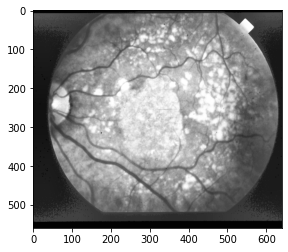

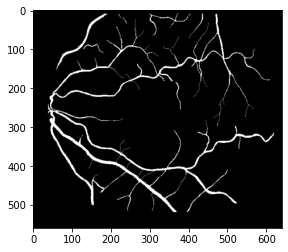

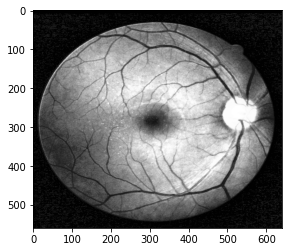

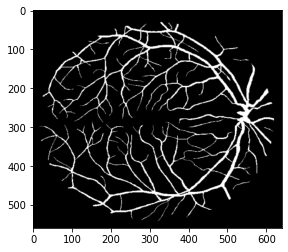

In [22]:
X_stare, Y_stare = shuffled_dataset(stare_images, stare_vessels)
X_drive, Y_drive = shuffled_dataset(drive_images, drive_vessels)

plt.imshow(X_stare[0], cmap= 'gray')
plt.show()
plt.imshow(Y_stare[0], cmap= 'gray')
plt.show()

plt.imshow(X_drive[0], cmap= 'gray')
plt.show()
plt.imshow(Y_drive[0], cmap= 'gray')
plt.show()

In [23]:
X_train = []
Y_train = []
for i in range(drive_images.shape[0]):
    X_train.append(drive_images[i])
    Y_train.append(drive_vessels[i])
for i in range(stare_images.shape[0]):
    X_train.append(stare_images[i])
    Y_train.append(stare_vessels[i])
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(X_train.shape)
print(Y_train.shape)

(30, 560, 640)
(30, 560, 640)


In [ ]:
for n_round in range(25):

    # train the discriminator
    print("Training Discriminators")
    d.trainable = True
    for l in d.layers:
        l.trainable = True
    d2.trainable = True
    for l in d2.layers:
        l.trainable = True
    d3.trainable = True
    for l in d3.layers:
        l.trainable = True

    real_imgs, real_vessels = shuffled_dataset(stare_images, stare_vessels)            
    fake_vessels = g.predict(real_imgs)
    fake_vessels = fake_vessels.reshape(real_vessels.shape[0], real_vessels.shape[1], real_vessels.shape[2])
    plt.imshow(fake_vessels[0], cmap='gray')
    plt.show()
        
    total_vessels = np.concatenate((real_vessels, fake_vessels))
        
    y_out = np.ones(len(total_vessels))
    y_out[len(real_vessels):] = 0
    
    print("Global Discriminator")
    dg_history = d.fit(total_vessels.reshape([total_vessels.shape[0], 560, 640, 1]), y_out, epochs =2, batch_size = 8)
    
    print("Local Discriminator 1")
    d2_history = d2.fit(total_vessels.reshape([total_vessels.shape[0], 560, 640, 1]), y_out, epochs =2, batch_size = 8)
    
    print("Local Discriminator 2")
    d3_history = d3.fit(total_vessels.reshape([total_vessels.shape[0], 560, 640, 1]), y_out, epochs =2, batch_size = 8)
  
    
    # train G (freeze discriminator)
    print("Training the GAN model")
    d.trainable = False
    for l in d.layers:
        l.trainable = False
    d2.trainable = False
    for l in d2.layers:
        l.trainable = False
    d3.trainable = False
    for l in d3.layers:
        l.trainable = False
       

    real_imgs, real_vessels = shuffled_dataset(X_train, Y_train)            
    history = model.fit(real_imgs, real_vessels, epochs = 2, batch_size = 1)

In [ ]:
path = "/content/drive/MyDrive/mini_project_full/Test Dataset/DRIVE/Images/"
drive_test = []
for i in ['01','02', '03', '04', '05', '06', '07', '08', '09','10','11','12','13','14','15','16','17','18', '19', '20']:
    img = cv2.imread(path + i + "_test.tif", cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (640,560))
    equalized_image = cv2.equalizeHist(resized_image)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gamma_corrected = clahe.apply(equalized_image)
    drive_test.append(gamma_corrected)


path = "/content/drive/MyDrive/mini_project_full/Test Dataset/DRIVE/Vessels/"
drive_test_vessels = []
for i in ['01','02', '03', '04', '05', '06', '07', '08', '09','10','11','12','13','14','15','16','17','18', '19', '20']:
    gif = cv2.VideoCapture(path + i + "_manual1.gif")
    ret, frame = gif.read()
    img = Image.fromarray(frame)
    img = cv2.cvtColor(np.asarray(img), cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(img, (640,560))
    equalized_image = cv2.equalizeHist(resized_image)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gamma_corrected = clahe.apply(equalized_image)

    drive_test_vessels.append(gamma_corrected)
    

path = "/content/drive/MyDrive/mini_project_full/Test Dataset/STARE/Images/"
stare_test = []
for i in ['0162','0163','0235','0236','0239','0240','0255','0291','0319','0324']:
    img = cv2.imread(path + 'im' + i + ".ppm", cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (640,560)) 
    equalized_image = cv2.equalizeHist(resized_image)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gamma_corrected = clahe.apply(equalized_image)    
    stare_test.append(gamma_corrected)


path = "/content/drive/MyDrive/mini_project_full/Test Dataset/STARE/Vessels/"
stare_test_vessels = []
for i in ['0162','0163','0235','0236','0239','0240','0255','0291','0319','0324']:
    img = cv2.imread(path + 'im' + i + ".ah.ppm", cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (640,560)) 
    equalized_image = cv2.equalizeHist(resized_image)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gamma_corrected = clahe.apply(equalized_image)
    stare_test_vessels.append(gamma_corrected)
    

drive_test = np.array(drive_test)
stare_test = np.array(stare_test)
drive_test_vessels = np.array(drive_test_vessels)
stare_test_vessels = np.array(stare_test_vessels)

print(drive_test.shape)
print(drive_test_vessels.shape)
print(stare_test.shape)
print(stare_test_vessels.shape)

In [ ]:
#Testing the model
print("Testing the model for DRIVE dataset")
generated_vessels = []
for i in range(len(drive_test)):
    generated_vessels.append(g.predict(drive_test[i].reshape([1, 560, 640, 1])))
    
for i in range(20):
    plt.imshow(generated_vessels[i].reshape([560,640]), cmap = 'gray')
    plt.show()

Testing the model for STARE dataset


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


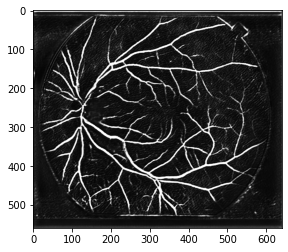

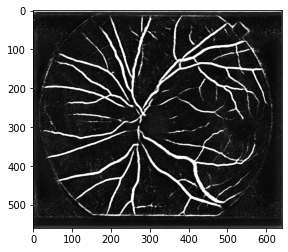

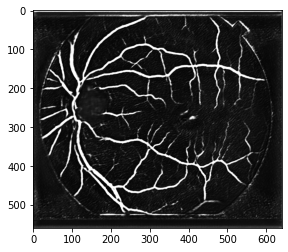

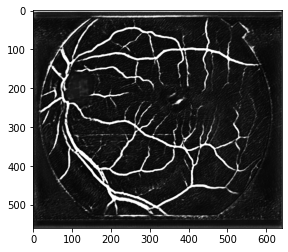

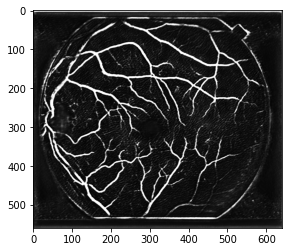

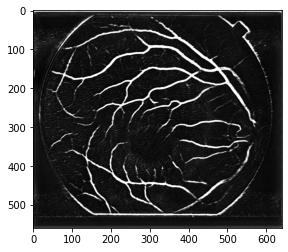

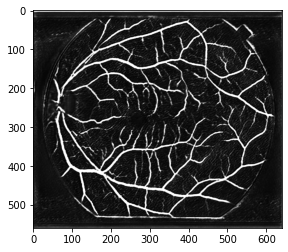

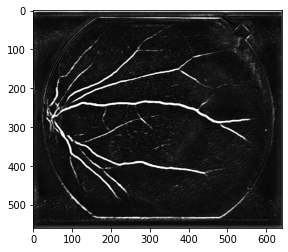

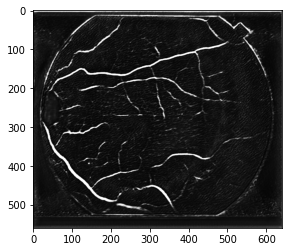

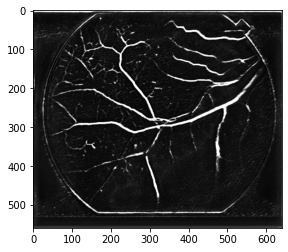

In [ ]:
#Testing the model
print("Testing the model for STARE dataset")
generated_vessels = []
for i in range(len(stare_test)):
    generated_vessels.append(g.predict(stare_test[i].reshape([1, 560, 640, 1])))
    
for i in range(10):
    plt.imshow(generated_vessels[i].reshape([560,640]), cmap = 'gray')
    plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


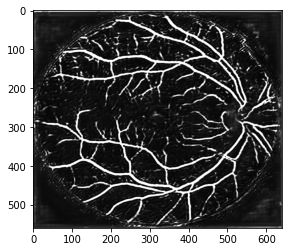

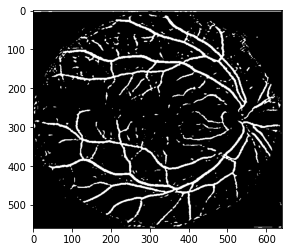

In [ ]:
import matplotlib
path = "/content/drive/MyDrive/mini_project_full/Test Dataset/live_test/test1.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(img, (640,560)) 
equalized_image = cv2.equalizeHist(resized_image)

    
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gamma_corrected = clahe.apply(equalized_image)   

generated_image = g.predict(gamma_corrected.reshape([1,560,640,1]))
plt.imshow(generated_image.reshape([560,640]), cmap='gray')
plt.show()
matplotlib.image.imsave('generated_image.png', generated_image.reshape([560,640]), cmap ='gray')

image = generated_image.reshape([560,640])>0.5
plt.imshow(image, cmap='gray')
plt.show()
matplotlib.image.imsave('filtered_image.png', image, cmap ='gray')